In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [11]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\pot_car_onio_carTribe.csv")
data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,Label
0,0,193,78,141,117,91,0,Kartoffel
1,1,139,55,143,111,70,0,Kartoffel
2,2,159,61,143,113,76,0,Kartoffel
3,3,144,92,126,97,66,0,Kartoffel
4,4,114,91,141,113,78,0,Kartoffel


In [12]:
data=data.drop(columns="Unnamed: 0")

In [14]:

data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=3
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=3

data["Label"]=data["Label"].astype("int")
data

,Hight,Width,R,G,B,green pixels,Label
0,193,78,141,117,91,0,1
1,139,55,143,111,70,0,1
2,159,61,143,113,76,0,1
3,144,92,126,97,66,0,1
4,114,91,141,113,78,0,1
...,...,...,...,...,...,...,...
868,254,240,100,95,57,10638,3
869,312,184,86,83,43,6540,3
870,255,144,129,108,78,1126,3
871,283,185,106,95,55,5837,3


In [19]:
X=data.iloc[:,0:6]
X.head()

,Hight,Width,R,G,B,green pixels
0,193,78,141,117,91,0
1,139,55,143,111,70,0
2,159,61,143,113,76,0
3,144,92,126,97,66,0
4,114,91,141,113,78,0


In [27]:
y=data.iloc[:,6:7]
y.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train

,Hight,Width,R,G,B,green pixels
544,146,122,129,94,72,0
398,201,85,130,117,80,117
765,177,152,155,141,103,376
312,222,66,152,120,76,0
326,203,108,70,56,48,0
...,...,...,...,...,...,...
106,141,53,123,95,63,0
270,260,51,155,80,36,0
860,258,127,104,76,42,837
435,139,102,141,90,55,0


In [40]:
y_train

,Label
544,2
398,0
765,3
312,0
326,0
...,...
106,1
270,0
860,3
435,2


In [36]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

C:\Users\Lennart Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [46]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)

In [47]:
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.9028571428571428
Accuracy Train: 1.0


Text(0.5, 1.0, 'Vegis TEST DATA')

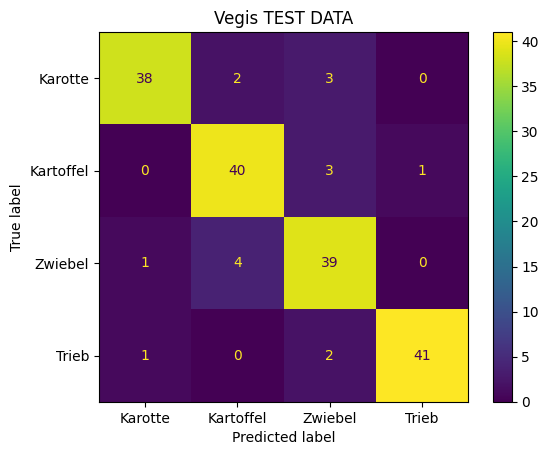

In [45]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")


Text(0.5, 1.0, 'Vegis TRAIN  DATA')

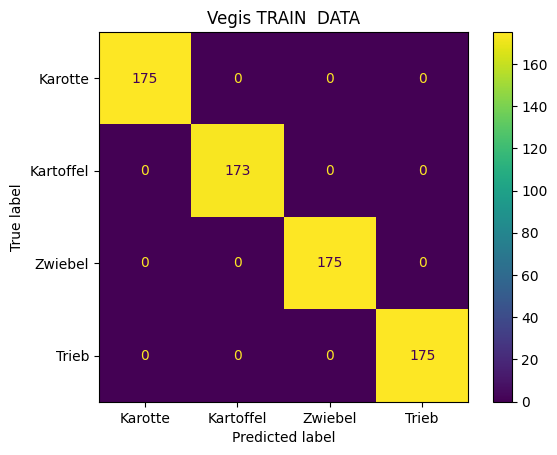

In [43]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")